# &#x1F4D1; &nbsp; TensorFlow  Cookbook 
## 0. Code Library and Links

In [46]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
body {background-color: gainsboro;} 
a {color: darkgreen; font-family: 'Orbitron';} 
h1 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: darkslategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
</style>

In [39]:
import numpy as np 

from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import tensorflow as tf
import tflearn

In [10]:
import tflearn.datasets.mnist as mnist

## 1. Data Sets

In [30]:
X_train, y_train, X_test, y_test = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

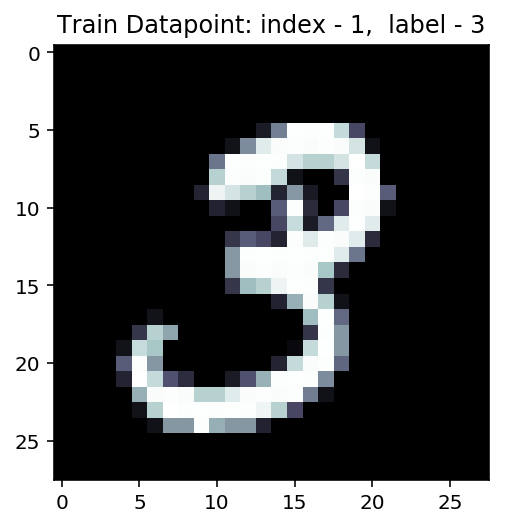

In [44]:
def display_digit(index):
    label = y_train[index].argmax(axis=0)
    image = X_train[index].reshape(28,28)
    plt.title('Train Datapoint: index - %d,  label - %d' % (index, label))
    plt.imshow(image, cmap=cm.bone)

display_digit(1)

## 2. Basics

## 3. Neural Networks; TensorFlow
### MLP

### CNN

### RNN 

## 4. Neural Networks; Tflearn
### MLP

In [67]:
def mlp_mc_model():
    tf.reset_default_graph()
    
    nn = tflearn.input_data([None, 784])
    
    nn = tflearn.fully_connected(nn, 784, activation='ReLU')    
    nn = tflearn.fully_connected(nn, 392, activation='ReLU')
    
    nn = tflearn.fully_connected(nn, 10, activation='Softmax')
    
    acc = tflearn.metrics.Accuracy()
    nn = tflearn.regression(nn, optimizer='adam', learning_rate=0.01, 
                            loss='categorical_crossentropy', metric=acc)
    model = tflearn.DNN(nn)
    return model

mlp_mc_model = mlp_mc_model()

In [68]:
mlp_mc_model.fit(X_train, y_train, validation_set=0.1, show_metric=True, batch_size=128, n_epoch=30)

Training Step: 11609  | total loss: 1.64038 | time: 12.453s
| Adam | epoch: 030 | loss: 1.64038 - acc: 0.9167 -- iter: 49408/49500
Training Step: 11610  | total loss: 1.47882 | time: 13.489s
| Adam | epoch: 030 | loss: 1.47882 - acc: 0.9242 | val_loss: 0.20089 - val_acc: 0.9687 -- iter: 49500/49500
--


In [69]:
y_test_mlp = np.array(mlp_model.predict(X_test)).argmax(axis=1)
y_test_num = y_test.argmax(axis=1)

test_accuracy_mlp = np.mean(y_test_mlp == y_test_num, axis=0)

print("Test Accuracy: {} %".format(test_accuracy_mlp*100))

Test Accuracy: 95.53 %


### CNN

### RNN